In [102]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
#Colocando os dados em suas respectivas variáveis
df_amb = pd.read_csv('data/data_life_bs.csv')
df_fem = pd.read_csv('data/data_life_f.csv')
df_mas = pd.read_csv('data/data_life_m.csv')
df_pop = pd.read_csv('data/data_pop.csv')
df_pop.columns = ['Year', 'Age', 'Feminino', 'Masculino', 'Total']

In [104]:
#formando lista com anos a serem trabalhados
lista_anos = []
for c in range(0, len(df_fem['Year'].unique()), 11):
    ano = df_fem['Year'].unique()[c]
    lista_anos.append(ano)

5. Atribuir um intervalo de tempo, sugerido em vinte anos, e calcular taxas de crescimento, nominais e geométricas, de cada intervalo, sobre a expectativa de vida ao
nascer (idade 0) e aos 60 anos, para homens, mulheres e ambos os sexos.

In [105]:
#função para extrair a expectativa de vida de um determinado ano e idade
def exp_vida(df, anos, idade):
    lista_exp_vida = []
    for c in range(0, len(anos)):
        ano = anos[c]
        exp_vida = df[(df['Year'] == ano) & (df['Age'] == idade)]['ex']
        lista_exp_vida.append(exp_vida.iloc[0])
    
    return pd.DataFrame(dict(Ano = anos, ex = lista_exp_vida))
#função para calcular a taxa de crescimento da expectativa de vida por faixa anual
def tx_exp(df):
    tx_ex_nominal = []
    tx_ex_geometrica = []
    faixa_ano = []
    for c in range(0, len(df['ex'])-1):
        tx_nominal = (df['ex'].iloc[c+1] - df['ex'].iloc[c])/df['ex'].iloc[c+1]
        tx_geometrica = ((df['ex'].iloc[c+1]/df['ex'].iloc[c])**(1/(df['Ano'].iloc[c+1] - df['Ano'].iloc[c]))) - 1
        tx_ex_nominal.append(tx_nominal*100)
        tx_ex_geometrica.append(tx_geometrica*100)
        ano = '{} - {}'.format(df['Ano'].iloc[c], df['Ano'].iloc[c+1])
        faixa_ano.append(ano)
    return pd.DataFrame(dict(Ano = faixa_ano, tx_nominal = tx_ex_nominal, tx_geometrica = tx_ex_geometrica))

In [106]:
ex_fem_0 = exp_vida(df_fem, lista_anos, 0)
ex_fem_60 = exp_vida(df_fem, lista_anos, 60)
tx_fem_0 = tx_exp(ex_fem_0)
tx_fem_60 = tx_exp(ex_fem_60)
print(tx_fem_0)
print(tx_fem_60)


           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    3.760533       0.349068
1  1994 - 2005    3.142892       0.290725
2  2005 - 2016    2.552232       0.235310
           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    9.468513       0.908396
1  1994 - 2005    7.897984       0.750744
2  2005 - 2016    6.786810       0.640963


In [107]:
ex_mas_0 = exp_vida(df_mas, lista_anos, 0)
ex_mas_60 = exp_vida(df_mas, lista_anos, 60)
tx_mas_0 = tx_exp(ex_mas_0)
tx_mas_60 = tx_exp(ex_mas_60)
print(tx_mas_0)
print(tx_mas_60)

           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    3.409091       0.315821
1  1994 - 2005    3.185365       0.294725
2  2005 - 2016    3.075015       0.284339
           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    6.569709       0.619681
1  1994 - 2005    8.363971       0.797212
2  2005 - 2016    7.600849       0.721247


In [108]:
ex_amb_0 = exp_vida(df_amb, lista_anos, 0)
ex_amb_60 = exp_vida(df_amb, lista_anos, 60)
tx_amb_0 = tx_exp(ex_amb_0)
tx_amb_60 = tx_exp(ex_amb_60)
print(tx_amb_0)
print(tx_amb_60)

           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    3.632148       0.336907
1  1994 - 2005    3.192020       0.295351
2  2005 - 2016    2.787879       0.257374
           Ano  tx_nominal  tx_geometrica
0  1983 - 1994    8.290155       0.789834
1  1994 - 2005    8.254105       0.786233
2  2005 - 2016    7.030936       0.664959


6. Gerar um gráfico que mostre a evolução da expectativa de vida ao nascer ao longo
do período observado, para homens, mulheres e ambos os sexos.

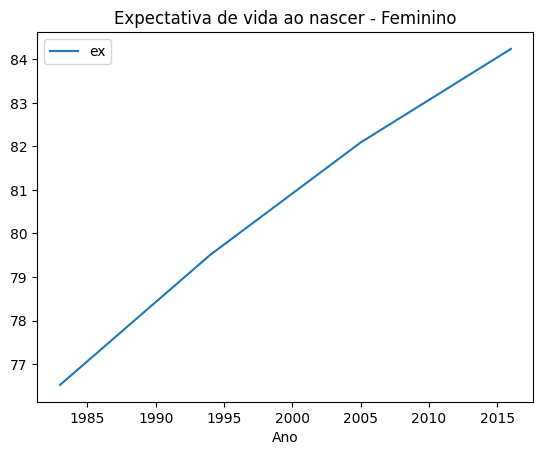

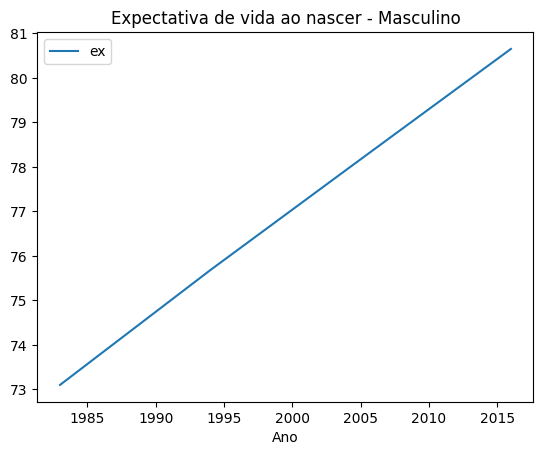

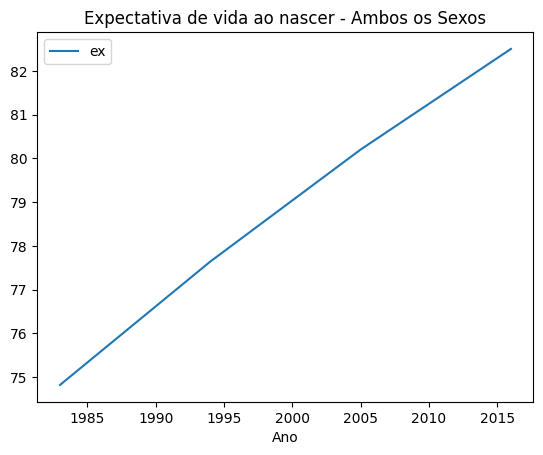

In [109]:
ex_fem_0.plot(x = 'Ano', y = 'ex', kind = 'line', title = 'Expectativa de vida ao nascer - Feminino');
ex_mas_0.plot(x = 'Ano', y = 'ex', kind = 'line', title = 'Expectativa de vida ao nascer - Masculino');
ex_amb_0.plot(x = 'Ano', y = 'ex', kind = 'line', title = 'Expectativa de vida ao nascer - Ambos os Sexos');

7. Gerar um gráfico que mostre a evolução da expectativa de vida aos 60 anos ao longo
do período observado, para homens, mulheres e ambos os sexos.

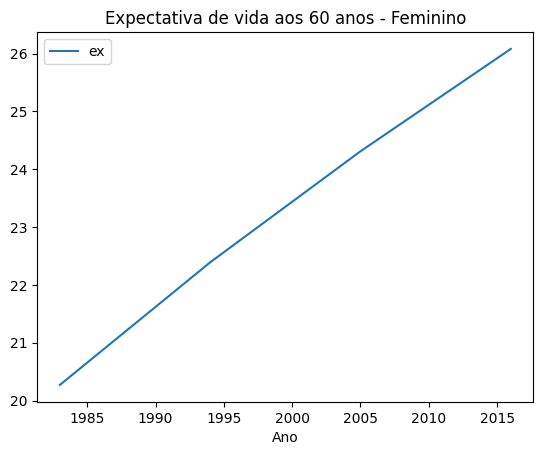

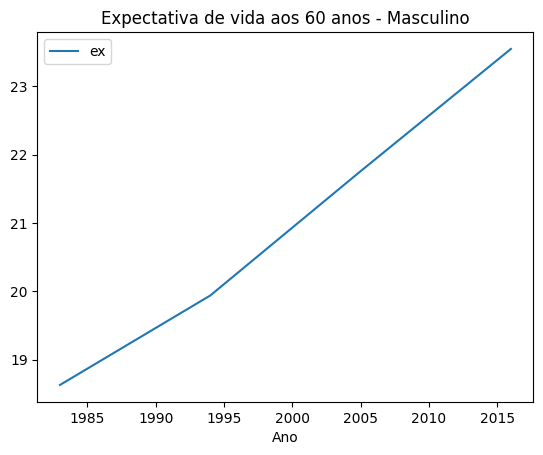

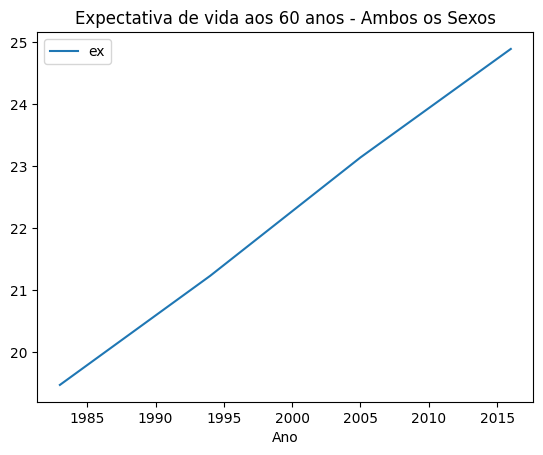

In [110]:
ex_fem_60.plot(x = 'Ano', y = 'ex', kind = 'line', title = 'Expectativa de vida aos 60 anos - Feminino');
ex_mas_60.plot(x = 'Ano', y = 'ex', kind = 'line', title = 'Expectativa de vida aos 60 anos - Masculino');
ex_amb_60.plot(x = 'Ano', y = 'ex', kind = 'line', title = 'Expectativa de vida aos 60 anos - Ambos os Sexos');

8. Gerar gráficos para observar a probabilidade de morte (qx ) em função da idade,
conforme os anos de observação (os intervalos sugeridos nos cálculos das taxas). O
eixo Y deve estar em escala logarítmica e o eixo X deve conter as idades.

In [111]:
def plot_qx(data, anos, sexo):
    idade = list(map(lambda x: x, range(0, 61)))
    probs = data[(data['Year'].isin(anos)) & (data['Age'].isin(idade))][['Year', 'Age', 'qx']]
    plt.figure(figsize=(17, 6))
    for c in range(0, len(anos)):
        ano = anos[c]
        probs_ano = probs[probs['Year'] == ano]
        
        plt.plot(probs_ano['Age'], probs_ano['qx'], label = ano)
    plt.title(f'Probabilidade de Morte em Relação a Idade - {sexo}')
    plt.xlabel('Idade')
    plt.ylabel('Probabilidade de Morte')
    plt.yscale('log')
    plt.legend(title='Anos', loc='lower right')
    plt.tick_params(axis='x', labelsize=8)
    plt.show()

    

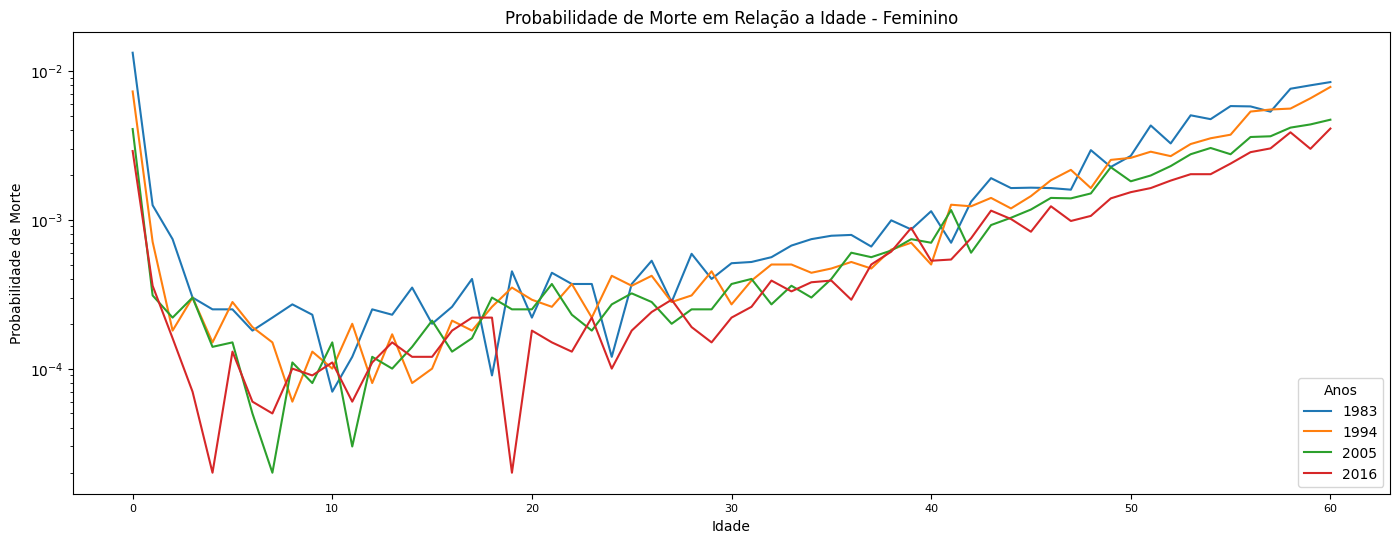

In [112]:
qx_fem = plot_qx(df_fem, lista_anos, 'Feminino')
qx_fem

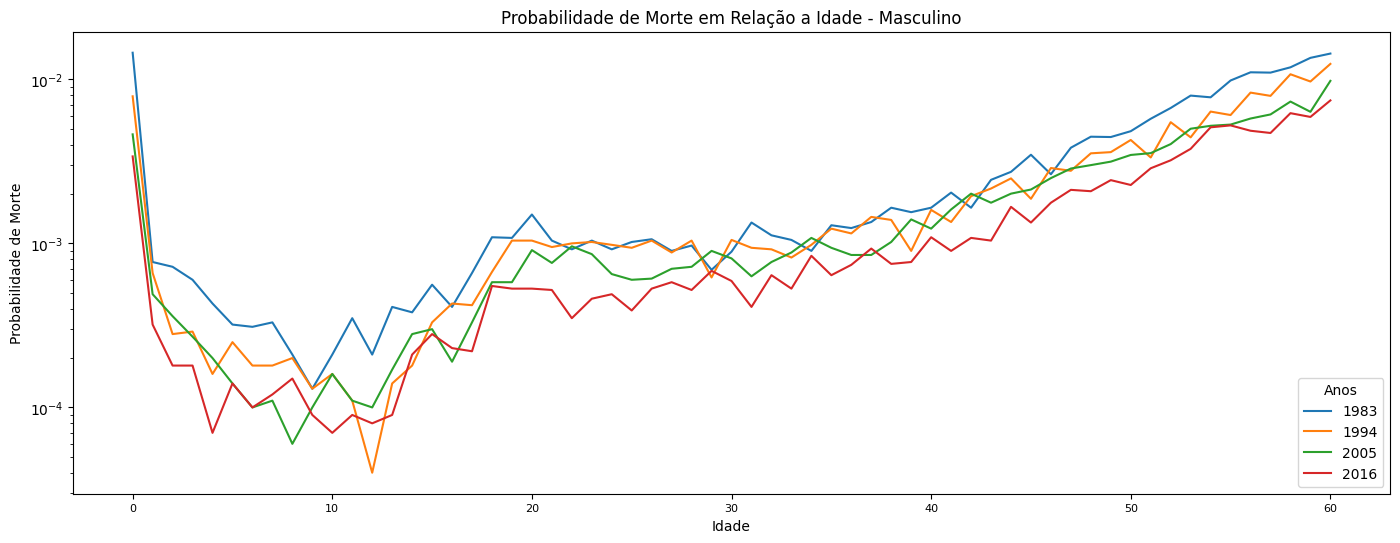

In [113]:
qx_mas = plot_qx(df_mas, lista_anos, 'Masculino')
qx_mas

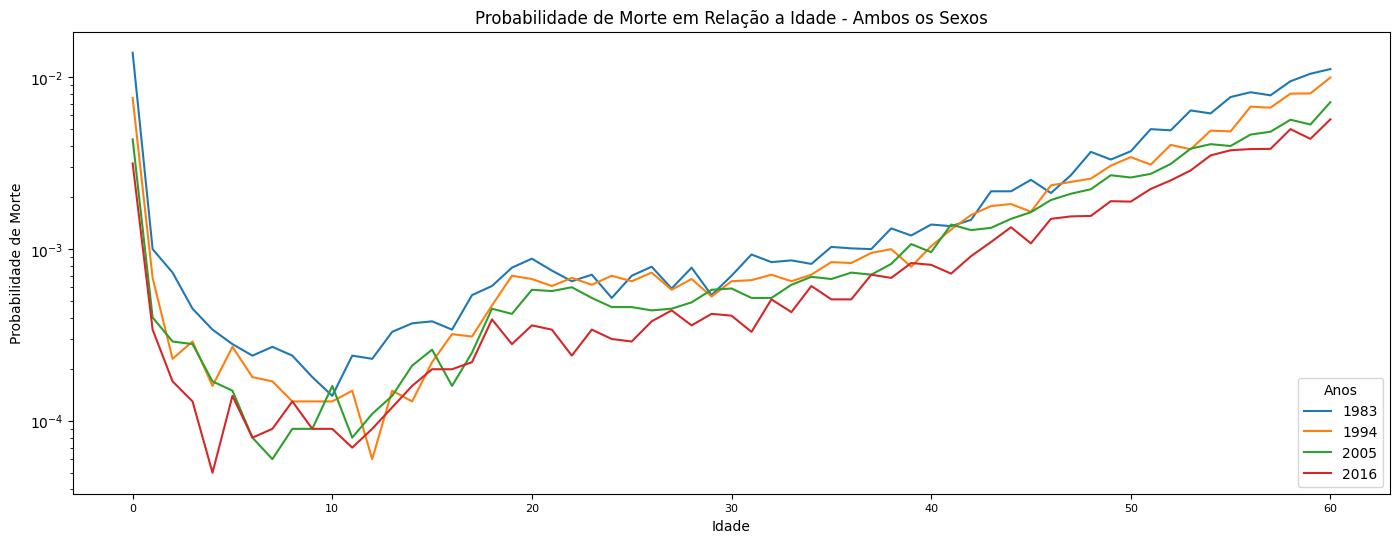

In [114]:
qx_amb = plot_qx(df_amb, lista_anos, 'Ambos os Sexos')
qx_amb

9. Calcular as taxas de crescimento anuais da população de homens, mulheres e ambos
os sexos.

In [115]:
#fazer

10. Gerar um gráfico que demonstre a taxa de crescimento anual. No eixo Y, a taxa; e
no eixo X, os anos observados.


In [116]:
#fazer

11. Gerar um gráfico da evolução da população no período observado, para homens,
mulheres e o total.

In [117]:
#fazer

12. Gerar pirâmides etárias, de homens e mulheres, para cada ano do intervalo escolhido.

In [118]:
#função para plotar a pirâmide etária
def plot_piramide_etaria(quant_ano, intervalo):
    fig, axs = plt.subplots(2, 2, figsize=(15, 8))
    axs = axs.ravel()

    #definindo intervalo de idade
    idade = list(map(lambda x: x, range(0, len(df_pop['Age'].unique()), intervalo)))
    #listando os anos
    years = list(map(lambda x: -x + df_pop['Year'].max(), range(0, quant_ano, intervalo)))
    
    #dados para homens
    hm = (df_pop[df_pop['Year'].isin(years)][['Masculino', 'Age', 'Year']])
    hm = hm[hm['Age'].isin(idade)][['Masculino', 'Year']]
    #dados para mulheres
    fm = (df_pop[df_pop['Year'].isin(years)][['Feminino', 'Age', 'Year']])
    fm = fm[fm['Age'].isin(idade)][['Feminino', 'Year']]
    #plotando os gráficos em conjunto
    for c in range(0, len(years)):
        masc = hm[hm['Year'] == years[c]]['Masculino']
        fem = fm[fm['Year'] == years[c]]['Feminino']
        
        ax = axs[c]
        ax.barh(idade, masc, color='blue', label='Homens', height=3)
        ax.barh(idade, [-val for val in fem], color='pink', label='Mulheres', height=3)
        
        ax.set_yticks(idade)
        ax.set_xlabel('População')
        ax.set_title(f'Pirâmide Etária - {years[c]}')
        ax.legend()
        ax.tick_params(axis='y', labelsize=6)
        ax.grid(False)
        
        xlim = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
        ax.set_xlim(-xlim, xlim)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

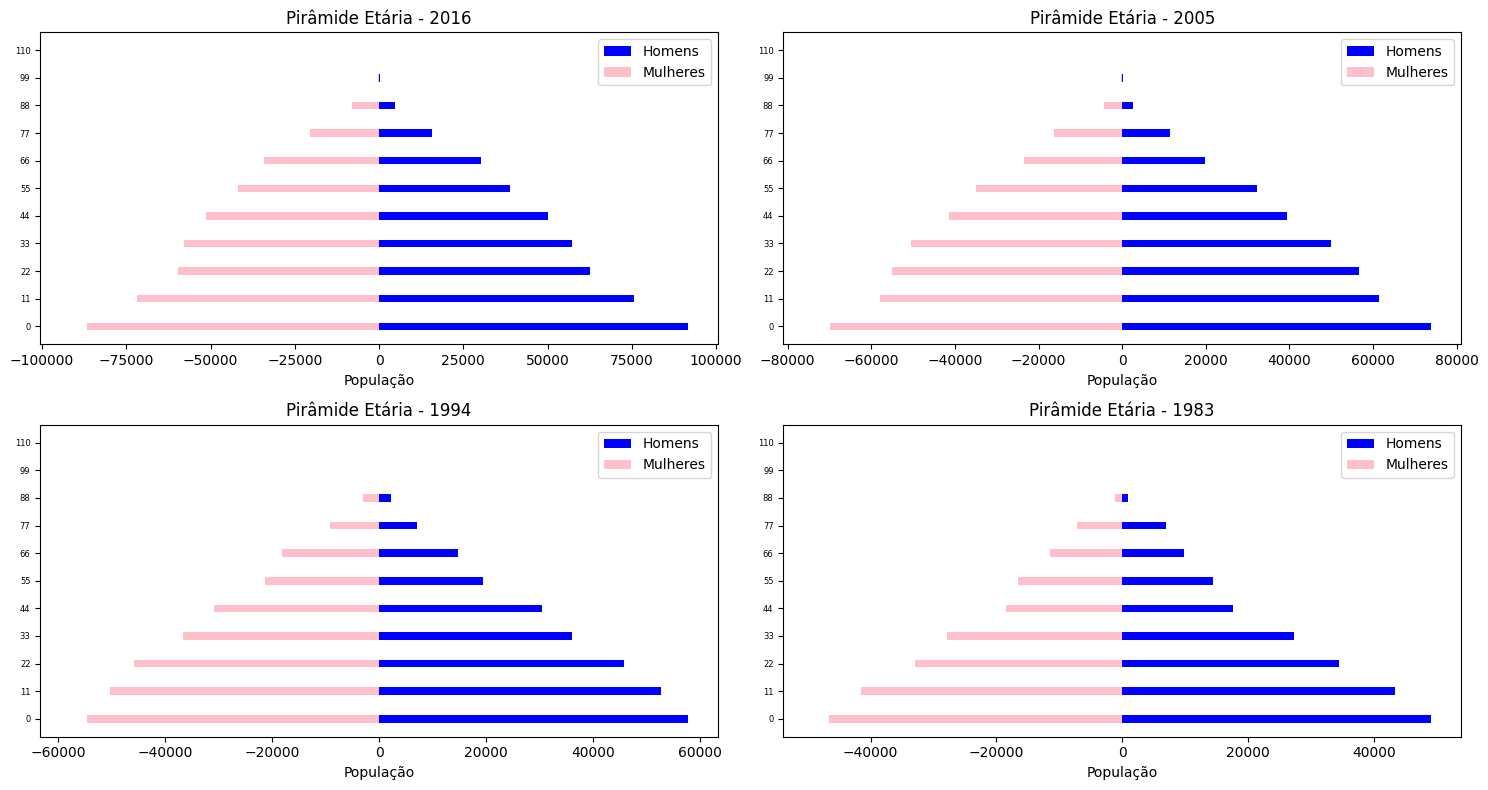

In [119]:
plot_piramide_etaria(34, 11)